In [1]:
library(Seurat)

Attaching SeuratObject

Attaching sp



In [2]:
library(reticulate)

In [3]:
pbmc.data <- Read10X(
    'filtered_gene_bc_matrices/hg19/'
)

as(<dgTMatrix>, "dgCMatrix") is deprecated since Matrix 1.5-0; do as(., "CsparseMatrix") instead



In [4]:
pbmc <- CreateSeuratObject(counts = pbmc.data)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [5]:
pbmc <- NormalizeData(pbmc)

When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 16104 rows containing missing values (geom_point).”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 16104 rows containing missing values (geom_point).”


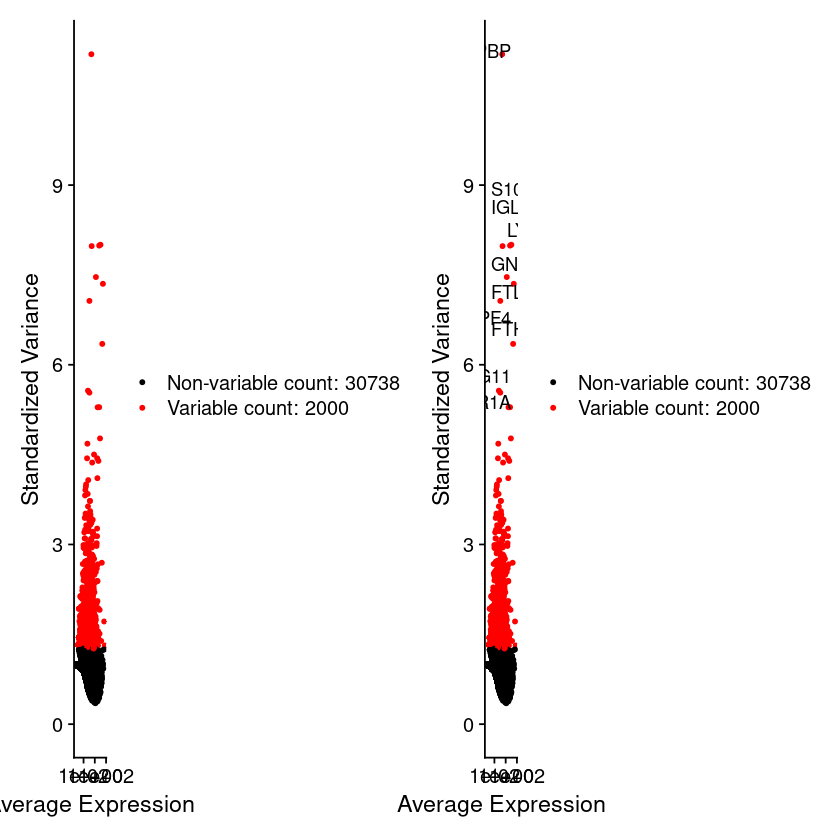

In [6]:
pbmc <- FindVariableFeatures(pbmc, selection.method = "vst", nfeatures = 2000)

# Identify the 10 most highly variable genes
top10 <- head(VariableFeatures(pbmc), 10)

# plot variable features with and without labels
plot1 <- VariableFeaturePlot(pbmc)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
plot1 + plot2

In [8]:
all.genes <- rownames(pbmc)
pbmc <- ScaleData(pbmc, features = all.genes)

Centering and scaling data matrix



In [9]:
pbmc <- RunPCA(pbmc, features = VariableFeatures(object = pbmc), npcs = 500)

PC_ 1 
Positive:  MALAT1, LTB, IL32, CD2, ACAP1, STK17A, CTSW, CD247, CCL5, GIMAP5 
	   AQP3, GZMA, CST7, TRAF3IP3, MAL, HOPX, ITM2A, GZMK, MYC, GIMAP7 
	   BEX2, ETS1, LDLRAP1, ZAP70, LYAR, RIC3, TNFAIP8, NKG7, KLRG1, SAMD3 
Negative:  CST3, TYROBP, LST1, AIF1, FTL, FCN1, LYZ, FTH1, S100A9, FCER1G 
	   TYMP, CFD, LGALS1, S100A8, CTSS, LGALS2, SERPINA1, SPI1, IFITM3, PSAP 
	   CFP, SAT1, IFI30, COTL1, S100A11, NPC2, LGALS3, GSTP1, PYCARD, NCF2 
PC_ 2 
Positive:  NKG7, PRF1, CST7, GZMA, GZMB, FGFBP2, CTSW, GNLY, GZMH, SPON2 
	   CCL4, FCGR3A, CCL5, CD247, XCL2, CLIC3, AKR1C3, SRGN, HOPX, CTSC 
	   TTC38, S100A4, ANXA1, IL32, IGFBP7, ID2, ACTB, XCL1, APOBEC3G, SAMD3 
Negative:  CD79A, MS4A1, TCL1A, HLA-DQA1, HLA-DRA, HLA-DQB1, LINC00926, CD79B, HLA-DRB1, CD74 
	   HLA-DPB1, HLA-DMA, HLA-DQA2, HLA-DRB5, HLA-DPA1, HLA-DMB, FCRLA, HVCN1, LTB, BLNK 
	   KIAA0125, P2RX5, IRF8, IGLL5, SWAP70, ARHGAP24, SMIM14, PPP1R14A, FCRL2, C16orf74 
PC_ 3 
Positive:  PPBP, PF4, SDPR, SPARC, GNG11, NRGN, GP

In [10]:
scaled.data <- GetAssayData(pbmc, slot = "scale.data")

We dump `scale.data` to the matrix and compute GADES.

In [10]:
write.csv(scaled.data, file='scaled_matrix.tsv', sep='\t')

Warning message in write.csv(scaled.data, file = "scaled_matrix.tsv", sep = "\t"):
“attempt to set 'sep' ignored”


In [15]:
dist.matrix <- as.matrix(
    read.table('../Hobotnica-GPU/TestPCA500_matrix_euclidean.csv', header=T, row.names=1, sep=',')
)

In [12]:
pbmc_distance <- FindNeighbors(dist.matrix, distance.matrix = T, return.neighbor = T)

Building SNN based on a provided distance matrix



In [56]:
dist.matrix[1:20, 1:20]

,AAACATACAACCAC.1,AAACATTGAGCTAC.1,AAACATTGATCAGC.1,AAACCGTGCTTCCG.1,AAACCGTGTATGCG.1,AAACGCACTGGTAC.1,AAACGCTGACCAGT.1,AAACGCTGGTTCTT.1,AAACGCTGTAGCCA.1,AAACGCTGTTTCTG.1,AAACTTGAAAAACG.1,AAACTTGATCCAGA.1,AAAGAGACGAGATA.1,AAAGAGACGCGAGA.1,AAAGAGACGGACTT.1,AAAGAGACGGCATT.1,AAAGATCTGGGCAA.1,AAAGCAGAAGCCAT.1,AAAGCAGATATCGG.1,AAAGCCTGTATGCG.1
AAACATACAACCAC-1,0.00000,40.86563,41.00000,39.47151,43.49713,39.77436,40.38564,43.27817,38.26225,41.55719,41.23106,34.38023,39.24283,40.66940,32.34192,33.31666,39.64846,42.05948,44.76606,39.66106
AAACATTGAGCTAC-1,40.86563,0.00000,42.39104,40.55860,44.98889,41.06093,43.30127,46.06517,39.03844,43.19722,37.00000,37.13489,42.94182,42.90688,36.66061,37.30952,41.49699,43.15090,44.09082,42.27292
AAACATTGATCAGC-1,41.00000,42.39104,0.00000,42.26109,45.03332,41.15823,41.86884,41.30375,40.38564,44.20407,40.59557,37.66962,40.23680,42.55585,37.44329,36.93237,43.27817,40.21194,45.57412,41.43670
AAACCGTGCTTCCG-1,39.47151,40.55860,42.26109,0.00000,43.88622,40.86563,42.34383,45.29901,39.42081,36.35932,39.84972,37.60319,39.20459,36.33180,36.42801,36.31804,34.78505,43.22037,40.54627,41.15823
AAACCGTGTATGCG-1,43.49713,44.98889,45.03332,43.88622,0.00000,43.57752,44.15881,47.81213,42.26109,45.51923,44.38468,40.90232,42.10701,45.15529,37.78889,38.65230,44.73254,44.02272,48.28043,44.00000
AAACGCACTGGTAC-1,39.77436,41.06093,41.15823,40.86563,43.57752,0.00000,40.92677,45.79301,38.96152,39.54744,41.31586,36.97296,39.42081,42.28475,34.71311,32.71085,37.45664,40.48457,45.11097,41.37632
AAACGCTGACCAGT-1,40.38564,43.30127,41.86884,42.34383,44.15881,40.92677,0.00000,43.52011,40.27406,42.84857,42.79018,36.98648,40.73082,43.63485,33.28663,34.36568,43.22037,40.95119,45.46427,39.19184
AAACGCTGGTTCTT-1,43.27817,46.06517,41.30375,45.29901,47.81213,45.79301,43.52011,0.00000,43.62339,45.40925,44.10215,41.96427,42.37924,46.21688,39.64846,38.58756,46.10857,42.90688,50.01000,43.72642
AAACGCTGTAGCCA-1,38.26225,39.03844,40.38564,39.42081,42.26109,38.96152,40.27406,43.62339,0.00000,37.37646,39.74921,34.55431,39.91240,41.55719,32.51154,32.66497,40.59557,39.67367,44.53089,39.56008
AAACGCTGTTTCTG-1,41.55719,43.19722,44.20407,36.35932,45.51923,39.54744,42.84857,45.40925,37.37646,0.00000,43.54308,37.26929,42.09513,41.49699,37.09447,35.31289,39.37004,42.53234,44.19276,41.02438


Here we upload distance matrix as the input to `FindNeighbours`

In [24]:
pbmc_distance <- FindNeighbors(dist.matrix, distance.matrix = T)
pbmc_distance_clusters <- FindClusters(pbmc_distance$snn, resolution = 1.0)

Building SNN based on a provided distance matrix

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2700
Number of edges: 2295894

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.1372
Number of communities: 4
Elapsed time: 1 seconds


In [57]:
pbmc_distance$snn[1:10, 1:10]

   [[ suppressing 10 column names ‘AAACATACAACCAC-1’, ‘AAACATTGAGCTAC-1’, ‘AAACATTGATCAGC-1’ ... ]]



10 x 10 sparse Matrix of class "dgCMatrix"
                                                                             
AAACATACAACCAC-1 1.0000000 0.11111111 0.1764706 .         0.2121212 0.2121212
AAACATTGAGCTAC-1 0.1111111 1.00000000 .         .         0.1111111 0.1764706
AAACATTGATCAGC-1 0.1764706 .          1.0000000 .         0.1428571 0.2121212
AAACCGTGCTTCCG-1 .         .          .         1.0000000 .         .        
AAACCGTGTATGCG-1 0.2121212 0.11111111 0.1428571 .         1.0000000 0.2903226
AAACGCACTGGTAC-1 0.2121212 0.17647059 0.2121212 .         0.2903226 1.0000000
AAACGCTGACCAGT-1 0.2500000 0.08108108 0.2500000 .         0.3333333 0.2500000
AAACGCTGGTTCTT-1 0.2500000 0.08108108 0.2121212 .         0.2500000 0.2903226
AAACGCTGTAGCCA-1 0.2903226 0.17647059 0.2121212 .         0.3333333 0.3333333
AAACGCTGTTTCTG-1 0.1764706 0.08108108 0.1764706 0.1764706 0.1764706 0.1428571
                                                           
AAACATACAACCAC-1 0.25000000 0.25000000 

## Loading UMAP over PBMC

Here code Hangs for SNN without setting `min.dist`

In [49]:
pbmc_distance_umap <- RunUMAP(pbmc_distance$snn)

Warning message:
“No assay specified, setting assay as RNA by default.”


In [50]:
pbmc@reductions[['UMAP']] <- pbmc_distance_umap

In [51]:
pbmc[['clusters']] <- pbmc_distance_clusters

In [55]:
head(pbmc_distance_clusters, 20)

,res.1
,<fct>
AAACATACAACCAC-1,0
AAACATTGAGCTAC-1,2
AAACATTGATCAGC-1,0
AAACCGTGCTTCCG-1,1
AAACCGTGTATGCG-1,0
AAACGCACTGGTAC-1,0
AAACGCTGACCAGT-1,0
AAACGCTGGTTCTT-1,0
AAACGCTGTAGCCA-1,0


In [52]:
table(pbmc_distance_clusters)

pbmc_distance_clusters
   0    1    2    3 
1648  690  358    4 

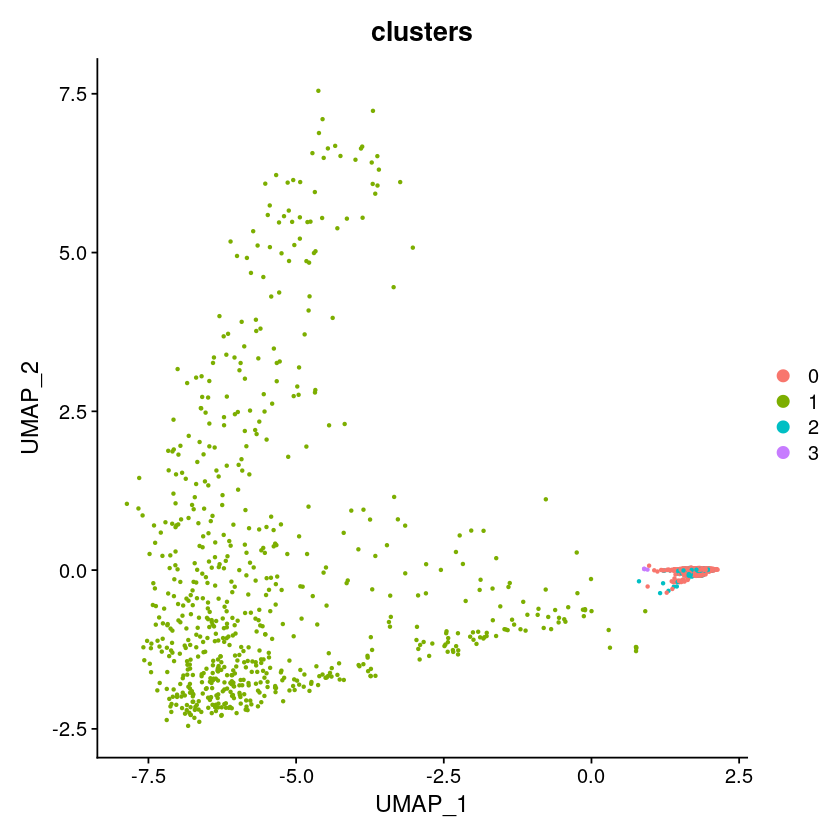

In [53]:
DimPlot(pbmc, reduction = 'UMAP', group.by = 'clusters')

## Cluster 1 has huge separation from other clusters (Monocytes)